In [1]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1.2)
import utilities



from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, jaccard_score, hamming_loss, confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.utils.multiclass import unique_labels

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterSampler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline, make_union
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

# CLASSIFIERS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

#REGRESSORS
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor


from scipy.spatial.distance import cdist, pdist
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn import (manifold, decomposition, ensemble,
                     discriminant_analysis, random_projection)

import statistics
#plt.style.use('seaborn')

import numpy as np
import tensorflow as tf


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


SEED = 3
import os
import random as rn

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
rn.seed(SEED)

name_prefix = 'wild'


In [2]:
# Data preparation
def data_preparation():
    
    MXene = MXene.strip()
    MXene = MXene.replace(' ', '')
    elements = MXene.split('2', 1)
    M = elements[0]
    X = elements[1][0]
    T = elements[1][1:]
    print(M, X, T)

In [3]:
# Evaluation
def multi_output_score(test, pred):
    true = 0
    for i in range(len(test)):
        if test[i]==pred[i]:
            true = true + 1
    return true/len(test)

In [4]:
# load data from csv file
def load_data(filename='data.csv'):
    X_df = pd.read_csv(filename)
    X_df = X_df.fillna(0)
    return X_df

In [5]:
def evaluation(true, pred):
    index_abs = 0
    jaccard_score_list = []
    hamming_score_list = []
    f1_score_list = []
    precision_score_list = []
    recall_score_list = []
    pred = pred.tolist()
    for row in true:
        single_score = jaccard_score(row, pred[index_abs], average='micro')
        hammung_score = hamming_loss(row, pred[index_abs])
        recall = recall_score(row, pred[index_abs], average='micro')
        precision = precision_score(row, pred[index_abs], average='micro')
        f1 = f1_score(row, pred[index_abs], average='micro')
        jaccard_score_list.append(single_score)
        hamming_score_list.append(hammung_score)
        precision_score_list.append(precision)
        recall_score_list.append(recall)
        f1_score_list.append(f1)
        index_abs = index_abs + 1
    return jaccard_score_list, hamming_score_list, f1_score_list, precision_score_list, recall_score_list


## Load data and preprocess

In [6]:
import pandas as pd

X_df = load_data('Gold_dataset/Au_nanoparticle_dataset.csv')
X_df.describe()

,ID,T,tau,time,N_total,N_bulk,N_surface,Volume,R_min,R_max,...,q6q6_S14,q6q6_S15,q6q6_S16,q6q6_S17,q6q6_S18,q6q6_S19,q6q6_S20,q6q6_S20+,Total_E,Formation_E
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4.000000e+03,4000.000000,4000.000000,...,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.0,4000.000000,4000.000000
mean,2000.500000,615.000000,0.000055,8.200000,3476.786500,2521.550250,955.23625,5.885368e-26,16.436127,26.028875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-12742.661846,851.243153
std,1154.844867,223.625808,0.000081,2.856929,3679.286769,2976.232459,721.87022,6.227819e-26,6.761951,9.822659,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13690.999369,771.395830
min,1.000000,273.000000,0.000000,1.000000,236.000000,89.000000,137.00000,4.000000e-27,0.519100,9.665200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-53772.854000,0.000000
25%,1000.750000,410.500000,0.000000,7.000000,1061.000000,618.750000,437.00000,1.800000e-26,11.898975,18.570825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-16504.678000,334.640675
50%,2000.500000,598.000000,0.000000,10.000000,1867.000000,1199.000000,666.00000,3.160000e-26,14.914300,22.978850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6754.782950,553.118000
75%,3000.250000,785.500000,0.000100,10.000000,4503.000000,3183.000000,1301.75000,7.620000e-26,19.352375,34.207525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3786.450450,1107.184500
max,4000.000000,973.000000,0.000250,10.000000,14277.000000,11580.000000,3190.00000,2.420000e-25,35.136500,66.289500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-783.428590,4470.351000


In [7]:
# TODO: 5 cases 
feature_set_surface = ['N_surface', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_surf', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_total = ['N_total', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'Avg_total', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15']
feature_set_condensed = ['N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_bulk', 'Avg_total', 'Avg_surf', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA','q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15',  'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_expanded = ['N_total', 'N_bulk', 'N_surface', 'Volume', 'R_min', 'R_max', 'R_diff', 'R_avg', 'R_std', 'R_skew', 'R_kurt', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1', 'Curve_2', 'Curve_3', 'Curve_4', 'Curve_5', 'Curve_6','Curve_7', 'Curve_8', 'Curve_9', 'Curve_10', 'Curve_11','Curve_12', 'Curve_13', 'Curve_14', 'Curve_15', 'Curve_16','Curve_17', 'Curve_18', 'Curve_19', 'Curve_20', 'Curve_21', 'Curve_22', 'Curve_23', 'Curve_24', 'Curve_25', 'Curve_26', 'Curve_27', 'Curve_28', 'Curve_29', 'Curve_30', 'Curve_31', 'Curve_32', 'Curve_33', 'Curve_34', 'Curve_35', 'Curve_36', 'Curve_37', 'Curve_38', 'Curve_39', 'Curve_40', 'Curve_41', 'Curve_42', 'Curve_43', 'Curve_44', 'Curve_45', 'Curve_46', 'Curve_47', 'Curve_48', 'Curve_49', 'Curve_50', 'Curve_51', 'Curve_52', 'Curve_53', 'Curve_54', 'Curve_55', 'Curve_56', 'Curve_57', 'Curve_58', 'Curve_59', 'Curve_60', 'Curve_61', 'Curve_62', 'Curve_63', 'Curve_64', 'Curve_65', 'Curve_66', 'Curve_67', 'Curve_68', 'Curve_69', 'Curve_70', 'Curve_71', 'Curve_72', 'Curve_73', 'Curve_74', 'Curve_75', 'Curve_76', 'Curve_77', 'Curve_78', 'Curve_79', 'Curve_80', 'Avg_bulk', 'Avg_total', 'Avg_surf', 'TCN_1', 'TCN_2', 'TCN_3', 'TCN_4', 'TCN_5', 'TCN_6', 'TCN_7', 'TCN_8', 'TCN_9', 'TCN_10', 'TCN_11', 'TCN_12', 'TCN_13', 'TCN_14', 'TCN_15', 'TCN_16', 'TCN_17', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'SCN_1', 'SCN_2', 'SCN_3', 'SCN_4', 'SCN_5', 'SCN_6', 'SCN_7', 'SCN_8', 'SCN_9', 'SCN_10', 'SCN_11', 'SCN_12', 'SCN_13', 'SCN_14', 'SCN_15', 'SCNO_0', 'SCNO_1', 'SCNO_2', 'SCNO_3', 'SCNO_4', 'SCNO_5', 'SCNO_6', 'SCNO_7', 'SCNO_8', 'SCNO_9', 'SCNO_10', 'SCNO_11', 'SCNO_12', 'SCNO_13', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA','q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf', 'q6q6_T0', 'q6q6_T1', 'q6q6_T2', 'q6q6_T3', 'q6q6_T4', 'q6q6_T5', 'q6q6_T6', 'q6q6_T7', 'q6q6_T8', 'q6q6_T9', 'q6q6_T10', 'q6q6_T11', 'q6q6_T12', 'q6q6_T13', 'q6q6_T14', 'q6q6_T15',  'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15', 'q6q6_S0', 'q6q6_S1', 'q6q6_S2', 'q6q6_S3', 'q6q6_S4', 'q6q6_S5', 'q6q6_S6', 'q6q6_S7', 'q6q6_S8', 'q6q6_S9', 'q6q6_S10', 'q6q6_S11', 'q6q6_S12', 'q6q6_S13']
feature_set_bulk = ['N_bulk', 'Avg_bulk', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15']


In [8]:
name_prefix = 'bulk'

feature_set_bulk = ['N_bulk', 'Avg_bulk', 'BCN_5', 'BCN_6', 'BCN_7', 'BCN_8', 'BCN_9', 'BCN_10', 'BCN_11', 'BCN_12', 'BCN_13', 'BCN_14', 'BCN_15', 'BCN_16', 'BCN_17', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_B0', 'q6q6_B1', 'q6q6_B2', 'q6q6_B3', 'q6q6_B4', 'q6q6_B5', 'q6q6_B6', 'q6q6_B7', 'q6q6_B8', 'q6q6_B9', 'q6q6_B10', 'q6q6_B11', 'q6q6_B12', 'q6q6_B13', 'q6q6_B14', 'q6q6_B15']

X_features = X_df[feature_set_bulk] 
feature_names = X_features.columns.values

y_multilabel = X_df.iloc[:,-1:] 
label_names = y_multilabel.columns.values

In [9]:
print('Feature names: \n', feature_names)
print('Label names: ', label_names)

Feature names: 
 ['N_bulk' 'Avg_bulk' 'BCN_5' 'BCN_6' 'BCN_7' 'BCN_8' 'BCN_9' 'BCN_10'
 'BCN_11' 'BCN_12' 'BCN_13' 'BCN_14' 'BCN_15' 'BCN_16' 'BCN_17' 'FCC'
 'HCP' 'ICOS' 'DECA' 'q6q6_B0' 'q6q6_B1' 'q6q6_B2' 'q6q6_B3' 'q6q6_B4'
 'q6q6_B5' 'q6q6_B6' 'q6q6_B7' 'q6q6_B8' 'q6q6_B9' 'q6q6_B10' 'q6q6_B11'
 'q6q6_B12' 'q6q6_B13' 'q6q6_B14' 'q6q6_B15']
Label names:  ['Formation_E']


<Figure size 360x360 with 0 Axes>

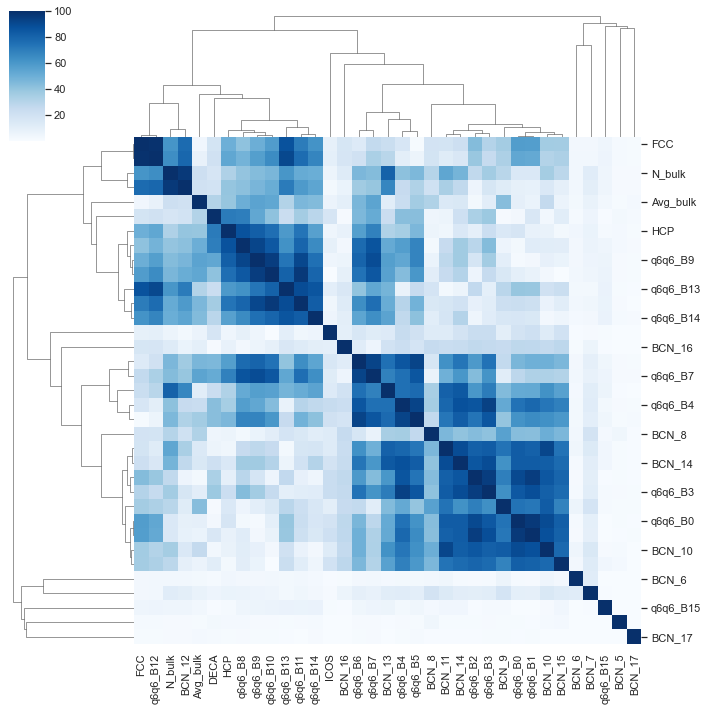

,N_bulk,Avg_bulk,BCN_5,BCN_6,BCN_7,BCN_8,BCN_9,BCN_10,BCN_11,BCN_12,...,q6q6_B6,q6q6_B7,q6q6_B8,q6q6_B9,q6q6_B10,q6q6_B11,q6q6_B12,q6q6_B13,q6q6_B14,q6q6_B15
N_bulk,100.000000,21.703884,1.277723,3.202261,11.478971,30.187139,28.943734,35.530015,53.864223,96.419760,...,45.860963,44.011833,40.040170,44.078520,46.380582,51.266222,63.883634,60.908565,50.318250,4.820421
Avg_bulk,21.703884,100.000000,0.935353,2.597777,7.177062,32.023973,43.348422,25.429964,14.393121,20.307686,...,46.205021,54.410907,49.749570,54.940148,53.492869,45.952103,7.735765,31.267110,44.516797,3.483142
BCN_5,1.277723,0.935353,100.000000,0.055944,0.188428,3.995691,1.150291,1.678707,0.922821,1.498894,...,1.325303,1.453309,2.044394,1.576695,1.430764,1.391152,1.678458,1.139894,1.793223,0.086744
BCN_6,3.202261,2.597777,0.055944,100.000000,11.682912,3.347006,5.608837,4.417646,3.979152,3.278243,...,2.902336,3.230267,2.914127,3.068372,3.533804,3.236759,3.246855,2.519900,1.984150,0.194062
BCN_7,11.478971,7.177062,0.188428,11.682912,100.000000,18.495726,17.604058,14.945547,13.406322,10.471987,...,9.123543,7.491578,6.005874,5.203431,4.938168,4.280633,3.295261,2.662082,3.116381,0.653633
BCN_8,30.187139,32.023973,3.995691,3.347006,18.495726,100.000000,55.721705,49.654138,45.914915,20.474122,...,16.533816,7.128877,2.546772,6.647210,10.768757,14.882342,18.226601,17.834331,11.189858,2.020980
BCN_9,28.943734,43.348422,1.150291,5.608837,17.604058,55.721705,100.000000,83.052352,73.872985,11.810821,...,25.942005,10.961841,5.122179,10.088881,14.916521,22.064181,33.066214,28.560932,15.687674,1.749744
BCN_10,35.530015,25.429964,1.678707,4.417646,14.945547,49.654138,83.052352,100.000000,91.644034,14.763950,...,49.072228,32.703572,11.157523,8.265084,2.804532,7.013116,31.063579,20.025934,2.825650,1.305977
BCN_11,53.864223,14.393121,0.922821,3.979152,13.406322,45.914915,73.872985,91.644034,100.000000,33.838775,...,62.772268,49.044487,25.005565,27.521359,24.812716,16.435425,12.056571,2.740025,17.589288,3.677246
BCN_12,96.419760,20.307686,1.498894,3.278243,10.471987,20.474122,11.810821,14.763950,33.838775,100.000000,...,36.367738,39.096079,42.091709,46.733052,50.514351,58.665010,78.791446,71.295591,54.268335,4.831704


In [10]:
import matplotlib.pyplot as plt

# Correlation Coefficient Filter

sns.set()
correlated = X_features.corr(method='spearman').abs().mul(100).astype(float)
plt.figure(figsize=(5,5))
cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=50, as_cmap=True)
cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation')
#cg = sns.clustermap(data = correlated, cmap='Blues', metric='correlation', annot =False, fmt='1g')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

plt.savefig('./Gold/bulk/correlation_matrix_{}.png'.format(name_prefix), dpi=300, bbox_inches='tight')
plt.show()
correlated




In [11]:
# print correlated features
for c1 in feature_names:
  for c2 in feature_names:
    if c1 != c2 and correlated[c1][c2] > 95:
        print(c1, c2)

N_bulk BCN_12
BCN_12 N_bulk
FCC q6q6_B12
q6q6_B0 q6q6_B1
q6q6_B1 q6q6_B0
q6q6_B10 q6q6_B11
q6q6_B11 q6q6_B10
q6q6_B12 FCC


In [12]:
# data processing

from sklearn import preprocessing

X_scaled = preprocessing.StandardScaler().fit_transform(X_features)
y_scaled = preprocessing.StandardScaler().fit_transform(y_multilabel)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [13]:
# Build base model

base_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

base_model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = base_model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True)

tf.keras.models.save_model(base_model, './Gold/base_model_{}.h5'.format(name_prefix))

print("Model saved!")

Epoch 1/200
320/320 [==============================] - 0s 811us/step - loss: 1.0943 - mae: 0.5969 - val_loss: 0.3333 - val_mae: 0.3312
Epoch 2/200
320/320 [==============================] - 0s 643us/step - loss: 0.4273 - mae: 0.3087 - val_loss: 0.1511 - val_mae: 0.2340
Epoch 3/200
320/320 [==============================] - 0s 640us/step - loss: 0.2857 - mae: 0.2418 - val_loss: 0.0917 - val_mae: 0.1965
Epoch 4/200
320/320 [==============================] - 0s 621us/step - loss: 0.2187 - mae: 0.2119 - val_loss: 0.0710 - val_mae: 0.1800
Epoch 5/200
320/320 [==============================] - 0s 612us/step - loss: 0.1771 - mae: 0.1931 - val_loss: 0.0617 - val_mae: 0.1686
Epoch 6/200
320/320 [==============================] - 0s 588us/step - loss: 0.1469 - mae: 0.1826 - val_loss: 0.0557 - val_mae: 0.1620
Epoch 7/200
320/320 [==============================] - 0s 604us/step - loss: 0.1253 - mae: 0.1723 - val_loss: 0.0539 - val_mae: 0.1611
Epoch 8/200
320/320 [==============================] - 

320/320 [==============================] - 0s 589us/step - loss: 0.0257 - mae: 0.1168 - val_loss: 0.0250 - val_mae: 0.1161
Epoch 122/200
320/320 [==============================] - 0s 573us/step - loss: 0.0252 - mae: 0.1162 - val_loss: 0.0241 - val_mae: 0.1119
Epoch 123/200
320/320 [==============================] - 0s 575us/step - loss: 0.0248 - mae: 0.1156 - val_loss: 0.0260 - val_mae: 0.1182
Epoch 124/200
320/320 [==============================] - 0s 572us/step - loss: 0.0257 - mae: 0.1164 - val_loss: 0.0251 - val_mae: 0.1165
Epoch 125/200
320/320 [==============================] - 0s 569us/step - loss: 0.0254 - mae: 0.1163 - val_loss: 0.0250 - val_mae: 0.1163
Epoch 126/200
320/320 [==============================] - 0s 572us/step - loss: 0.0255 - mae: 0.1165 - val_loss: 0.0243 - val_mae: 0.1118
Epoch 127/200
320/320 [==============================] - 0s 571us/step - loss: 0.0256 - mae: 0.1161 - val_loss: 0.0248 - val_mae: 0.1119
Epoch 128/200
320/320 [==============================] 

Epoch 181/200
320/320 [==============================] - 0s 606us/step - loss: 0.0251 - mae: 0.1156 - val_loss: 0.0235 - val_mae: 0.1133
Epoch 182/200
320/320 [==============================] - 0s 590us/step - loss: 0.0248 - mae: 0.1155 - val_loss: 0.0243 - val_mae: 0.1147
Epoch 183/200
320/320 [==============================] - 0s 579us/step - loss: 0.0245 - mae: 0.1143 - val_loss: 0.0249 - val_mae: 0.1177
Epoch 184/200
320/320 [==============================] - 0s 573us/step - loss: 0.0242 - mae: 0.1145 - val_loss: 0.0242 - val_mae: 0.1107
Epoch 185/200
320/320 [==============================] - 0s 610us/step - loss: 0.0246 - mae: 0.1145 - val_loss: 0.0250 - val_mae: 0.1181
Epoch 186/200
320/320 [==============================] - 0s 582us/step - loss: 0.0241 - mae: 0.1143 - val_loss: 0.0244 - val_mae: 0.1168
Epoch 187/200
320/320 [==============================] - 0s 580us/step - loss: 0.0248 - mae: 0.1147 - val_loss: 0.0241 - val_mae: 0.1106
Epoch 188/200
320/320 [==================

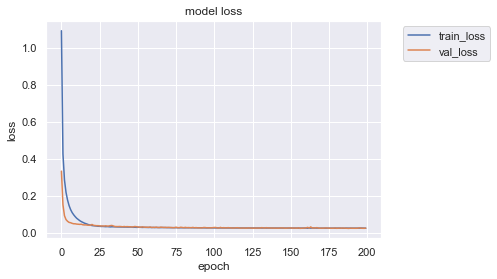

In [14]:
# plot training curve
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('./Gold/base_model_{}_loss_learning_curve.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
plt.show()

In [15]:
import utilities

stop_call_back = utilities.EarlyStoppingByLossVal(monitor='mae', value=0.025, verbose=0)

base_model = tf.keras.models.load_model('./Gold/base_model_{}.h5'.format(name_prefix))

base_model.trainable = False

feature_model = utilities.Feature_Importance_Layer.make_feature_model(base_model, shape=(35))

opt = utilities.tf.keras.optimizers.Adam()

feature_model.compile(loss='mse', optimizer=opt, metrics=['mae'], run_eagerly=True)

history = feature_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_data=(X_test, y_test), shuffle=True, callbacks=[stop_call_back])


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 35)]              0         
_________________________________________________________________
feature_extractor (Sequentia (None, 35)                35        
_________________________________________________________________
sequential_1 (Sequential)    (10, 1)                   36        
Total params: 71
Trainable params: 35
Non-trainable params: 36
_________________________________________________________________
Epoch 1/100
320/320 [==============================] - 2s 7ms/step - loss: 0.5210 - mae: 0.4994 - val_loss: 0.2794 - val_mae: 0.3557
Epoch 2/100
320/320 [==============================] - 2s 7ms/step - loss: 0.1808 - mae: 0.2766 - val_loss: 0.1615 - val_mae: 0.2479
Epoch 3/100
320/320 [==============================] - 2s 7ms/step - loss: 0.1220 - mae: 0.2143 - val_loss: 0.1242 - val_mae: 0.

Epoch 57/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0267 - mae: 0.1170 - val_loss: 0.0279 - val_mae: 0.1176
Epoch 58/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0266 - mae: 0.1166 - val_loss: 0.0279 - val_mae: 0.1183
Epoch 59/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0267 - mae: 0.1170 - val_loss: 0.0278 - val_mae: 0.1185
Epoch 60/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0266 - mae: 0.1164 - val_loss: 0.0277 - val_mae: 0.1182
Epoch 61/100
320/320 [==============================] - 2s 7ms/step - loss: 0.0266 - mae: 0.1165 - val_loss: 0.0277 - val_mae: 0.1189
Epoch 62/100
320/320 [==============================] - 2s 8ms/step - loss: 0.0264 - mae: 0.1165 - val_loss: 0.0276 - val_mae: 0.1185
Epoch 63/100
320/320 [==============================] - 3s 8ms/step - loss: 0.0265 - mae: 0.1158 - val_loss: 0.0277 - val_mae: 0.1197
Epoch 64/100
320/320 [==============================] - 3s 8ms

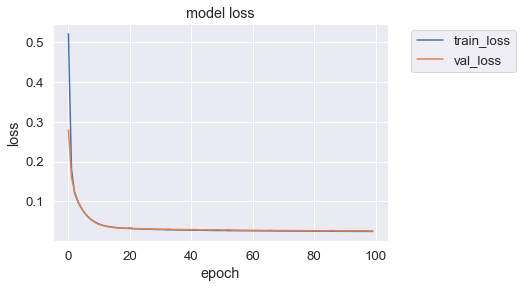

In [16]:
# plot training curve
plt.plot(history.history['loss'])
# plt.plot(history.history['mae'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_mae'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig('./Gold/feature_model_{}_loss_learning_curve.png'.format(name_prefix), dpi = 300, bbox_inches='tight')
plt.show()

In [9]:
weights = np.load('gold_weights_output.npy')

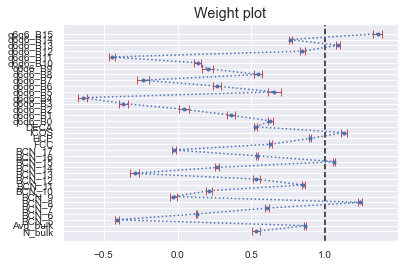

In [29]:
x = feature_names
y = weights_mean
fig, ax = plt.subplots(nrows=1, sharex=True)
ax.errorbar(y, x, xerr=weights_std, fmt='.:', elinewidth=1, capsize=4, color='b', ecolor='r')
ax.set_title('Weight plot')
# ax.set_yticklabels(labels, fontsize=8)
ax.tick_params(axis='both', labelsize=10)
ax.axvline(1, color="k", linestyle="--")
# ax.set_xlabel('weight')
# ax.set_facecolor("none")
# ax.grid(b=False)
fig.savefig('./Gold/{}_weight_plot.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [38]:
a = []
for i in range(50):
    weights_mean = np.abs(np.subtract(weights[:i], 1)).mean(axis=0)
    a.append(utilities.rank_importance(feature_names, weights_mean))

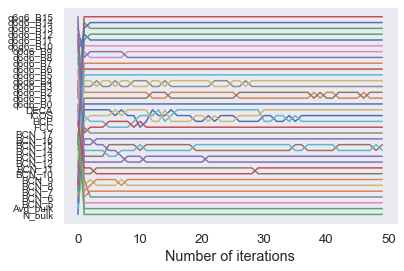

In [40]:
from matplotlib import pyplot as plt
a = np.array(a)
# print(a)
b = [i for i in range(50)]
for i in range(35):
    plt.plot(b, a[:,i])
plt.yticks([i for i in range(1,36)], feature_names, fontsize=10)
plt.xlabel("Number of iterations")
plt.grid(b=None)

plt.savefig('./Gold/{}_training_interation_converge.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [15]:
from copy import copy
import numpy as np
from numpy import arange

from scipy.spatial.distance import cdist,pdist
from scipy.stats import levene, pearsonr

from pandas import Series, DataFrame

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D




def plot_feature_importance(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)


    plt.bar(x_val, w_lr_sort)
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def plot_feature_importance_reverse(ft_set, feature_importance, show_cols = 30):
    
    fig = plt.figure(figsize=(5,4))
    w_lr_sort, ft_sorted, _ = return_feature_importance(ft_set, feature_importance, show_cols = show_cols)
    x_val = list(range(len(w_lr_sort)))
    
    for i in range(16):
        plt.text(-0.3+i, 2, ft_sorted[i], rotation=90, fontsize=12)

    plt.bar(x_val, w_lr_sort, color='r')
    plt.ylabel('Ranking', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(x_val)
    
    return fig

def return_feature_importance(ft_set, feature_importance, show_cols = 30):

    w_lr = copy(np.abs(feature_importance))
    w_lr = 100 * (w_lr / w_lr.max())
    sorted_index_pos = [index for index, num in sorted(enumerate(w_lr), key=lambda x: x[-1], 
                   reverse=True)]

    ft_sorted = []
    w_lr_sort = []
    for i, idx in enumerate(sorted_index_pos):
        if i > show_cols:
            break
        ft_sorted.append(ft_set[idx])
        w_lr_sort.append(w_lr[idx])

    return w_lr_sort, ft_sorted, sorted_index_pos





In [11]:
weights_std = np.std(weights, axis=0)
weights_std

array([0.03019264, 0.00618661, 0.01210435, 0.00652988, 0.01365296,
       0.01352373, 0.02215521, 0.02232103, 0.01078523, 0.02602938,
       0.03198964, 0.01235823, 0.0046936 , 0.00906593, 0.01241452,
       0.01055483, 0.00575862, 0.02238822, 0.01285691, 0.01558703,
       0.0275307 , 0.03246839, 0.03234932, 0.03158022, 0.04409164,
       0.02721511, 0.04046584, 0.02651908, 0.03839828, 0.0224132 ,
       0.0223309 , 0.01601046, 0.0133108 , 0.00993062, 0.03146331],
      dtype=float32)

In [12]:
weights_mean = weights.mean(axis=0)
weights_mean

array([ 0.53214747,  0.8644257 , -0.40991297,  0.12887824,  0.6036852 ,
        1.2345873 , -0.02792539,  0.21357995,  0.8513311 ,  0.5343912 ,
       -0.29125986,  0.26756793,  1.061088  ,  0.5394673 , -0.02270649,
        0.63014674,  0.900177  ,  1.1277071 ,  0.52861667,  0.62951785,
        0.36251867,  0.04360063, -0.3667442 , -0.6435174 ,  0.65429777,
        0.26532164, -0.23440748,  0.546676  ,  0.20417549,  0.13570912,
       -0.44457194,  0.8455592 ,  1.0876756 ,  0.7637962 ,  1.3565935 ],
      dtype=float32)

In [13]:
weights_scaled = np.abs(np.subtract(weights, 1)).mean(axis=0)
weights_scaled

array([0.4678525 , 0.13557409, 1.4099128 , 0.87112164, 0.3963148 ,
       0.23458734, 1.0279254 , 0.78642   , 0.14866883, 0.46560875,
       1.2912598 , 0.7324321 , 0.06108785, 0.46053272, 1.0227065 ,
       0.36985317, 0.09982292, 0.12770712, 0.47138336, 0.37048215,
       0.63748133, 0.9563992 , 1.3667444 , 1.6435177 , 0.3457023 ,
       0.7346783 , 1.2344077 , 0.45332396, 0.79582465, 0.86429083,
       1.444572  , 0.15444072, 0.08767579, 0.23620392, 0.35659322],
      dtype=float32)

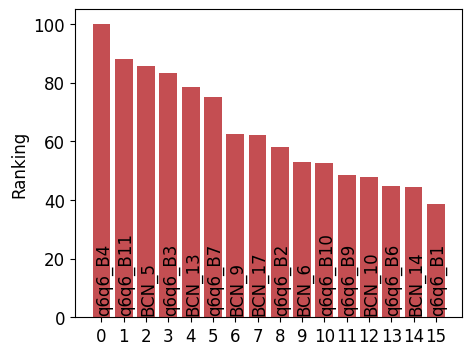

In [17]:
plt.style.use('default')

fig_FI_Weight_unimportant = plot_feature_importance_reverse(feature_names, weights_scaled, 15)
fig_FI_Weight_unimportant.savefig('./New_figures/bulk/{}_hist_TV_only.png'.format(name_prefix), dpi = 300, bbox_inches='tight')


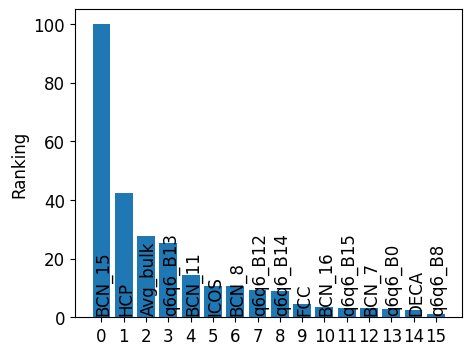

In [19]:
fig_FI_VT = plot_feature_importance(feature_names, np.abs((weights_mean)/(weights_std*weights_scaled)), 15)
fig_FI_VT.savefig('./New_figures/bulk/{}_hist_VT.png'.format(name_prefix), dpi = 300, bbox_inches='tight')

In [78]:
# Benchmark
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = base_model.evaluate(X_train, y_train, batch_size=10)
print("test loss, test acc:", results)

Evaluate on test data
320/320 [==============================] - 0s 467us/step - loss: 0.0253 - mae: 0.1109
test loss, test acc: [0.02527403086423874, 0.11092919111251831]


In [79]:
# Baseline
array_aux = np.zeros(np.shape(X_train))
results = base_model.evaluate(array_aux, y_train, batch_size=10)

320/320 [==============================] - 0s 441us/step - loss: 0.9931 - mae: 0.7455


In [80]:
# Individula contribution
single_contribution_set = []
for i in range(len(X_train[-1])):
    aux_array = []
    array_aux = np.zeros(np.shape(X_train))
    array_aux[:, i] = X_train[:, i]
    results = base_model.evaluate(array_aux, y_train, batch_size=10)
    
    aux_array.append(results[0])
    aux_array.append(results[1])
    single_contribution_set.append(aux_array)

320/320 [==============================] - 0s 451us/step - loss: 0.9929 - mae: 0.7455


In [81]:
# All contribution
# Set each feature to be 0 and calculate the drop of change as its contribution
# it is different from permutation method, providing permutation method results
contribution_set = []
for i in range(len(X_train[-1])):
    aux_array = []
    array_aux = np.ones(np.shape(X_train))
    array_aux[:,i] = 0
    X_new = array_aux * X_train
    results_new = base_model.evaluate(X_new, y_train, batch_size=10)
    aux_array.append(results_new[0])
    aux_array.append(results_new[1])
    contribution_set.append(aux_array)

320/320 [==============================] - 0s 462us/step - loss: 0.0253 - mae: 0.1109


In [82]:
# Individual contribution of each single feature
# Compare this with permutation method
# Can be used to calculate feature interaction
contribution_set = np.round(contribution_set, 4)
for i in range(len(contribution_set)):
    contribution_set[i] = abs(contribution_set[i][0]-0.0253)
contribution_set

array([[2.370e-02, 2.370e-02],
       [2.400e-03, 2.400e-03],
       [1.000e-04, 1.000e-04],
       [2.000e-04, 2.000e-04],
       [2.000e-04, 2.000e-04],
       [4.000e-04, 4.000e-04],
       [4.100e-03, 4.100e-03],
       [2.010e-02, 2.010e-02],
       [8.018e-01, 8.018e-01],
       [9.270e-02, 9.270e-02],
       [1.550e-02, 1.550e-02],
       [7.830e-02, 7.830e-02],
       [4.100e-03, 4.100e-03],
       [1.000e-04, 1.000e-04],
       [1.000e-04, 1.000e-04],
       [5.609e-01, 5.609e-01],
       [1.918e-01, 1.918e-01],
       [1.000e-04, 1.000e-04],
       [6.600e-03, 6.600e-03],
       [3.723e-01, 3.723e-01],
       [5.820e-02, 5.820e-02],
       [9.000e-04, 9.000e-04],
       [4.000e-04, 4.000e-04],
       [1.100e-03, 1.100e-03],
       [7.000e-04, 7.000e-04],
       [1.200e-03, 1.200e-03],
       [2.000e-04, 2.000e-04],
       [1.450e-02, 1.450e-02],
       [1.200e-03, 1.200e-03],
       [2.600e-03, 2.600e-03],
       [1.840e-02, 1.840e-02],
       [9.159e-01, 9.159e-01],
       [

In [83]:
# We find the contribution and coefficient relationship through previous method (benchmark)
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(len(X_train[-1])):
        array_aux = np.ones(np.shape(X_train))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X_train
        results_new = base_model.evaluate(X_new, y_train, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change to banchmark
        con = abs(0.0253-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        print(con, weight)

        weights_output[j][i] = con/con_feature

#     break

320/320 [==============================] - 0s 443us/step - loss: 0.0276 - mae: 0.1276
0.0023275780051946644 0.49142757
320/320 [==============================] - 0s 486us/step - loss: 0.0271 - mae: 0.1187
0.0017731896162033085 0.8706899
320/320 [==============================] - 0s 444us/step - loss: 0.0253 - mae: 0.1110
2.5102731585503052e-05 -0.422905
320/320 [==============================] - 0s 436us/step - loss: 0.0252 - mae: 0.1109
6.164996623992877e-05 0.13320561
320/320 [==============================] - 0s 429us/step - loss: 0.0252 - mae: 0.1107
0.00014308294951915698 0.60461235
320/320 [==============================] - 0s 453us/step - loss: 0.0250 - mae: 0.1104
0.00034774481058120685 1.2277626
320/320 [==============================] - 0s 467us/step - loss: 0.0252 - mae: 0.1108
9.782067239284473e-05 -0.043922547
320/320 [==============================] - 0s 472us/step - loss: 0.0252 - mae: 0.1113
0.00013701445162296252 0.20552808
320/320 [==============================] - 0s

320/320 [==============================] - 0s 437us/step - loss: 0.0622 - mae: 0.1386
0.03693848834633827 0.75630784
320/320 [==============================] - 0s 427us/step - loss: 0.0253 - mae: 0.1109
2.9701876640319397e-05 1.3713377
320/320 [==============================] - 0s 430us/step - loss: 0.0301 - mae: 0.1343
0.004754133385419846 0.5828827
320/320 [==============================] - 0s 433us/step - loss: 0.0271 - mae: 0.1187
0.0017624477416276936 0.8682841
320/320 [==============================] - 0s 431us/step - loss: 0.0253 - mae: 0.1110
2.3554873466492127e-05 -0.41167158
320/320 [==============================] - 0s 427us/step - loss: 0.0252 - mae: 0.1109
6.243227720260577e-05 0.1363417
320/320 [==============================] - 0s 425us/step - loss: 0.0252 - mae: 0.1107
0.00014362684190273242 0.60807246
320/320 [==============================] - 0s 425us/step - loss: 0.0250 - mae: 0.1104
0.0003442951917648311 1.2481722
320/320 [==============================] - 0s 432us/

320/320 [==============================] - 0s 432us/step - loss: 0.6465 - mae: 0.5768
0.6211585661888123 0.8273358
320/320 [==============================] - 0s 428us/step - loss: 0.0655 - mae: 0.1883
0.04018705697059631 1.1073698
320/320 [==============================] - 0s 426us/step - loss: 0.0651 - mae: 0.1405
0.03976723165512085 0.78806007
320/320 [==============================] - 0s 441us/step - loss: 0.0253 - mae: 0.1109
2.9700013995170166e-05 1.4103358
320/320 [==============================] - 0s 434us/step - loss: 0.0293 - mae: 0.1323
0.004023123395442963 0.55767894
320/320 [==============================] - 0s 430us/step - loss: 0.0270 - mae: 0.1185
0.0017187668502330784 0.8584287
320/320 [==============================] - 0s 434us/step - loss: 0.0253 - mae: 0.1110
2.212063670158429e-05 -0.40130025
320/320 [==============================] - 0s 432us/step - loss: 0.0252 - mae: 0.1109
5.8990108966826965e-05 0.12274794
320/320 [==============================] - 0s 430us/step 

320/320 [==============================] - 0s 433us/step - loss: 0.0244 - mae: 0.1115
0.0009420087069272991 0.17060176
320/320 [==============================] - 0s 432us/step - loss: 0.0243 - mae: 0.1156
0.0010073633372783657 -0.4244813
320/320 [==============================] - 0s 430us/step - loss: 0.7034 - mae: 0.6013
0.6781135460853577 0.8634658
320/320 [==============================] - 0s 424us/step - loss: 0.0630 - mae: 0.1851
0.037703033399581906 1.0772119
320/320 [==============================] - 0s 426us/step - loss: 0.0638 - mae: 0.1396
0.03852479518651962 0.7742559
320/320 [==============================] - 0s 425us/step - loss: 0.0253 - mae: 0.1109
2.9681387543677856e-05 1.3907083
320/320 [==============================] - 0s 427us/step - loss: 0.0291 - mae: 0.1318
0.003838291254639626 0.5510352
320/320 [==============================] - 0s 424us/step - loss: 0.0271 - mae: 0.1187
0.0017858351141214375 0.87351584
320/320 [==============================] - 0s 427us/step - 

320/320 [==============================] - 0s 432us/step - loss: 0.0305 - mae: 0.1150
0.005243401837348938 0.49488682
320/320 [==============================] - 0s 439us/step - loss: 0.0254 - mae: 0.1110
0.00013501928448677106 0.15422156
320/320 [==============================] - 0s 435us/step - loss: 0.0243 - mae: 0.1117
0.0010275003939867015 0.19510962
320/320 [==============================] - 0s 433us/step - loss: 0.0243 - mae: 0.1160
0.0009563026458024974 -0.4433769
320/320 [==============================] - 0s 437us/step - loss: 0.6769 - mae: 0.5901
0.6516057512283325 0.8468471
320/320 [==============================] - 0s 433us/step - loss: 0.0651 - mae: 0.1878
0.03978694589138031 1.1025752
320/320 [==============================] - 0s 425us/step - loss: 0.0617 - mae: 0.1382
0.036379273843765256 0.7498906
320/320 [==============================] - 0s 439us/step - loss: 0.0253 - mae: 0.1109
2.971118986606555e-05 1.3766961
320/320 [==============================] - 0s 430us/step -

320/320 [==============================] - 0s 434us/step - loss: 0.0248 - mae: 0.1108
0.0004593023538589473 0.26411763
320/320 [==============================] - 0s 430us/step - loss: 0.0253 - mae: 0.1109
7.511910796165894e-06 -0.23626249
320/320 [==============================] - 0s 430us/step - loss: 0.0311 - mae: 0.1156
0.005849648129940033 0.5360158
320/320 [==============================] - 0s 432us/step - loss: 0.0255 - mae: 0.1110
0.0001928618669509892 0.20771813
320/320 [==============================] - 0s 433us/step - loss: 0.0244 - mae: 0.1115
0.0009231382489204402 0.16560031
320/320 [==============================] - 0s 426us/step - loss: 0.0243 - mae: 0.1154
0.0010354278117418285 -0.41256136
320/320 [==============================] - 0s 424us/step - loss: 0.6838 - mae: 0.5930
0.6584769150733948 0.8511866
320/320 [==============================] - 0s 428us/step - loss: 0.0642 - mae: 0.1867
0.03893785537481308 1.0923216
320/320 [==============================] - 0s 419us/ste

320/320 [==============================] - 0s 429us/step - loss: 0.0247 - mae: 0.1104
0.000578377532958984 -0.6499788
320/320 [==============================] - 0s 432us/step - loss: 0.0248 - mae: 0.1106
0.0005017278224229808 0.72040486
320/320 [==============================] - 0s 434us/step - loss: 0.0248 - mae: 0.1108
0.0004729276031255718 0.2733382
320/320 [==============================] - 0s 434us/step - loss: 0.0253 - mae: 0.1109
5.996346473698122e-07 -0.1876807
320/320 [==============================] - 0s 423us/step - loss: 0.0316 - mae: 0.1160
0.006336003404855729 0.567809
320/320 [==============================] - 0s 426us/step - loss: 0.0255 - mae: 0.1110
0.00019381740391254468 0.2086011
320/320 [==============================] - 0s 430us/step - loss: 0.0245 - mae: 0.1114
0.0008449611693620677 0.14609958
320/320 [==============================] - 0s 427us/step - loss: 0.0243 - mae: 0.1159
0.0009726380437612529 -0.43764532
320/320 [==============================] - 0s 424us/

320/320 [==============================] - 0s 433us/step - loss: 0.0253 - mae: 0.1110
1.0497730970383118e-05 0.0522109
320/320 [==============================] - 0s 428us/step - loss: 0.0252 - mae: 0.1108
0.00014120167791843372 -0.31253302
320/320 [==============================] - 0s 429us/step - loss: 0.0247 - mae: 0.1104
0.0005566050738096233 -0.6207873
320/320 [==============================] - 0s 428us/step - loss: 0.0248 - mae: 0.1106
0.0004521777361631389 0.63781273
320/320 [==============================] - 0s 425us/step - loss: 0.0248 - mae: 0.1108
0.0005107951790094371 0.29931834
320/320 [==============================] - 0s 427us/step - loss: 0.0253 - mae: 0.1109
7.752192020416687e-06 -0.2378711
320/320 [==============================] - 0s 424us/step - loss: 0.0312 - mae: 0.1157
0.005947932463884354 0.5425226
320/320 [==============================] - 0s 435us/step - loss: 0.0254 - mae: 0.1110
0.00013704584240913434 0.15612824
320/320 [==============================] - 0s 4

320/320 [==============================] - 0s 431us/step - loss: 0.1767 - mae: 0.2187
0.15140661211013795 0.62824416
320/320 [==============================] - 0s 425us/step - loss: 0.0333 - mae: 0.1229
0.008018787813186646 0.33099887
320/320 [==============================] - 0s 424us/step - loss: 0.0253 - mae: 0.1110
5.94383776187854e-06 0.02892103
320/320 [==============================] - 0s 428us/step - loss: 0.0251 - mae: 0.1108
0.00015394962131977039 -0.34865448
320/320 [==============================] - 0s 424us/step - loss: 0.0247 - mae: 0.1103
0.000600822407007217 -0.68047124
320/320 [==============================] - 0s 423us/step - loss: 0.0248 - mae: 0.1106
0.0004773457974195476 0.6794972
320/320 [==============================] - 0s 431us/step - loss: 0.0249 - mae: 0.1108
0.0004393720507621761 0.25076392
320/320 [==============================] - 0s 429us/step - loss: 0.0253 - mae: 0.1109
1.0447439551353882e-05 -0.25671655
320/320 [==============================] - 0s 430

320/320 [==============================] - 0s 430us/step - loss: 0.0252 - mae: 0.1107
0.00013049333095550494 1.1399169
320/320 [==============================] - 0s 424us/step - loss: 0.0251 - mae: 0.1151
0.00018541528582572894 0.523098
320/320 [==============================] - 0s 426us/step - loss: 0.1768 - mae: 0.2187
0.15146447331905366 0.6283688
320/320 [==============================] - 0s 432us/step - loss: 0.0360 - mae: 0.1260
0.010653879356384278 0.3907098
320/320 [==============================] - 0s 433us/step - loss: 0.0253 - mae: 0.1110
2.0947170257568787e-05 0.06680391
320/320 [==============================] - 0s 430us/step - loss: 0.0251 - mae: 0.1107
0.00016367076635360675 -0.3763928
320/320 [==============================] - 0s 426us/step - loss: 0.0247 - mae: 0.1104
0.0005870257943868633 -0.66169834
320/320 [==============================] - 0s 442us/step - loss: 0.0248 - mae: 0.1106
0.0004568809151649471 0.6455458
320/320 [==============================] - 0s 434us/

320/320 [==============================] - 0s 434us/step - loss: 0.2523 - mae: 0.3250
0.22700079889297486 0.6286837
320/320 [==============================] - 0s 430us/step - loss: 0.1830 - mae: 0.2338
0.1576788237810135 0.8995777
320/320 [==============================] - 0s 430us/step - loss: 0.0252 - mae: 0.1107
0.00012962533831596332 1.1255596
320/320 [==============================] - 0s 425us/step - loss: 0.0252 - mae: 0.1152
0.00013001276850700336 0.530623
320/320 [==============================] - 0s 425us/step - loss: 0.1812 - mae: 0.2209
0.1559049150466919 0.6378916
320/320 [==============================] - 0s 424us/step - loss: 0.0343 - mae: 0.1241
0.009002733838558197 0.3542699
320/320 [==============================] - 0s 423us/step - loss: 0.0253 - mae: 0.1110
1.089510321617554e-06 0.038943868
320/320 [==============================] - 0s 422us/step - loss: 0.0251 - mae: 0.1107
0.00018025389611720996 -0.42425102
320/320 [==============================] - 0s 423us/step - 

320/320 [==============================] - 0s 438us/step - loss: 0.0252 - mae: 0.1108
7.819025516509967e-05 0.5173964
320/320 [==============================] - 0s 426us/step - loss: 0.0253 - mae: 0.1109
2.2459912300109436e-05 -0.033714578
320/320 [==============================] - 0s 424us/step - loss: 0.2520 - mae: 0.3247
0.2266698739051819 0.62821054
320/320 [==============================] - 0s 430us/step - loss: 0.1815 - mae: 0.2328
0.15620977790355683 0.8950261
320/320 [==============================] - 0s 422us/step - loss: 0.0252 - mae: 0.1107
0.0001298712074756618 1.129608
320/320 [==============================] - 0s 428us/step - loss: 0.0252 - mae: 0.1154
7.793507277965503e-05 0.5375021
320/320 [==============================] - 0s 436us/step - loss: 0.1853 - mae: 0.2229
0.1600020638227463 0.64655846
320/320 [==============================] - 0s 428us/step - loss: 0.0365 - mae: 0.1267
0.011249400538206101 0.40317032
320/320 [==============================] - 0s 434us/step - 

320/320 [==============================] - 0s 436us/step - loss: 0.0276 - mae: 0.1220
0.0023395622640848164 0.28156507
320/320 [==============================] - 0s 435us/step - loss: 0.0300 - mae: 0.1224
0.0046876909703016285 1.0517563
320/320 [==============================] - 0s 432us/step - loss: 0.0252 - mae: 0.1108
8.066757321357684e-05 0.5521389
320/320 [==============================] - 0s 425us/step - loss: 0.0253 - mae: 0.1109
2.5143983960151245e-05 -0.0079171555
320/320 [==============================] - 0s 433us/step - loss: 0.2623 - mae: 0.3317
0.23701199502944947 0.64284456
320/320 [==============================] - 0s 435us/step - loss: 0.1852 - mae: 0.2352
0.1598934939622879 0.9063999
320/320 [==============================] - 0s 431us/step - loss: 0.0252 - mae: 0.1107
0.00012938505709171252 1.121574
320/320 [==============================] - 0s 428us/step - loss: 0.0251 - mae: 0.1149
0.00023260540068149524 0.5165056
320/320 [==============================] - 0s 428us/s

In [84]:
weights_output = np.insert(weights_output, 0, np.ones(35), 0)

In [87]:
weights_output = np.nan_to_num(weights_output)
pl, weights_contribution = lu(weights_output, permute_l=True)

In [90]:
# weights_contribution = np.nan_to_num(weights_contribution)
solve(weights, np.ones(35))

ValueError: Input a needs to be a square matrix.

[ 2.86325211e+01 -6.32478120e+01  5.35315900e+01 -5.27331547e+01
  5.67036937e+01 -1.38399691e+01  7.03618214e+01 -1.36463001e+02
 -1.73503614e+02  6.00572594e+01 -6.84145807e+01  1.08568265e+02
  9.09380581e+00 -3.71893451e+01 -3.09107212e+01  1.19931711e+02
 -1.21042688e+02 -1.83251557e+01 -3.76915052e+01  3.36030314e+01
 -2.27581476e+01 -2.69528201e+01  1.19849262e+01  6.23239266e+00
  2.25853863e+01  3.06709408e+01  1.70844002e+01 -4.97578123e+01
  1.81737797e-01  6.26650437e+01 -4.15501913e+01  2.81035521e+01
 -1.25319784e+02  4.58688775e+02 -1.79693667e+01]
[ 2.75540464e+01 -6.45266224e+01  5.26878015e+01 -5.30804018e+01
  5.49348718e+01 -1.40191320e+01  6.93080065e+01 -1.33326712e+02
 -1.71890037e+02  5.86033851e+01 -6.72061419e+01  1.06821165e+02
  1.00905673e+01 -3.39124117e+01 -3.08923684e+01  1.17661887e+02
 -1.18368218e+02 -1.77616726e+01 -3.56869856e+01  3.19035421e+01
 -2.23384332e+01 -2.61811496e+01  1.22053733e+01  6.34008027e+00
  2.18547911e+01  2.93213591e+01  1.6800

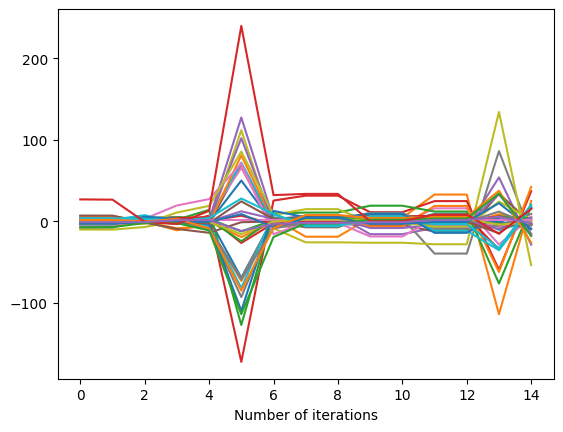

In [20]:
from scipy.linalg import lu
from scipy.linalg import solve

c = []
for i in range(35, 50):
    pl, weights_contribution = lu(weights[0:i], permute_l=True)
    weights_contribution = np.nan_to_num(weights_contribution)
#     print(weights_contribution)
    out = solve(weights_contribution, np.ones(35))
    print(out)
    out = out/out[-9]
    c.append(out)
c = np.array(c)
c_T = c.T
ran = [i for i in range(len(c_T[0]))]
for i in range(len(c_T)):
    plt.plot(ran, c_T[i])
plt.xlabel("Number of iterations")
plt.savefig('./New_figures/bulk/{}_contribution_calculation_iteration.png'.format(name_prefix), dpi=300, bbox_inches='tight')


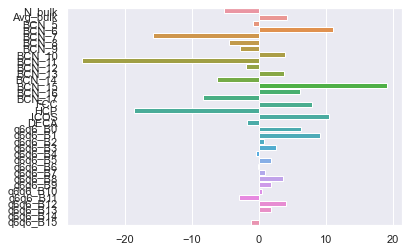

In [36]:
import seaborn as sns; sns.set()
sns.set(color_codes=True)
sns.set(font_scale=1)

sns.barplot(c[-6], feature_names)
plt.savefig('./Gold/bulk/{}_contribution_calculation.png'.format(name_prefix), dpi=300, bbox_inches='tight')


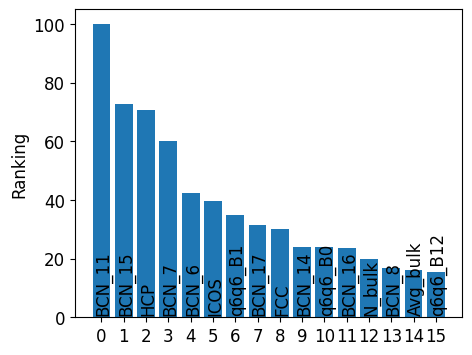

In [21]:
fig_FI_contribution_cal = plot_feature_importance(feature_names, c[-6], 15)

In [22]:
fig_FI_contribution_cal.savefig('./New_figures/bulk/{}_cc.png'.format(name_prefix), dpi=300, bbox_inches='tight')


In [ ]:
# Contribution calculation requries 

In [ ]:
# We find the contribution and coefficient relationship through previous method (benchmark)
weights_output = np.zeros(np.shape(weights))
X_data = []
y_data = []
contribution_set = np.round(contribution_set, 4)
for j in range(len(weights)):
    for i in range(len(X[-1])):
        array_aux = np.ones(np.shape(X))
        array_aux[:,i] = 1-weights[j][i]
#         banchmark
        con_feature = contribution_set[i][0]
        X_new = array_aux * X
        results_new = base_model.evaluate(X_new, y, batch_size=10)
        results_round = np.round(results_new[0],4)
#         the loss change to banchmark
        con = abs(24.7673-results_new[0])
#         weights_output[j][i] = con/con_feature
        
        weight = weights[j][i]
        print(con, weight)

        weights_output[j][i] = con/con_feature

#     break